# 데이터 불러오기(CSV 파일)

In [30]:
# Pandas를 pd라는 이름으로 임포트한다
import numpy as np
import pandas as pd
import scipy.stats

In [119]:
# 학생번호를 인덱스로 csv 파일을 읽어들여, 변수 df에 저장
df = pd.read_csv('C:/Users/chang/Desktop/data_01.csv',
                 index_col='학생번호')
# 변수 df를 표시
df

,학년,악력,윗몸일으키기,점수,순위
학생번호,,,,,
1,1,40.2,34,15,4
2,1,34.2,14,7,10
3,1,28.8,27,11,7
4,2,39.0,27,14,5
5,2,50.9,32,17,2
6,2,36.5,20,9,9
7,3,36.6,31,13,6
8,3,49.2,37,18,1
9,3,26.0,28,10,8


In [32]:
df['악력']

학생번호
1     40.2
2     34.2
3     28.8
4     39.0
5     50.9
6     36.5
7     36.6
8     49.2
9     26.0
10    47.4
Name: 악력, dtype: float64

In [33]:
df.shape

(10, 5)

# 데이터 변수 추가

In [34]:
df = pd.read_csv('C:/Users/chang/Downloads/source/python_stat_sample-master/data/ch2_scores_em.csv',
                 index_col='student number')

In [35]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [36]:
scores_df["total"]=scores_df["english"]+scores_df["mathematics"]

In [37]:
scores_df["mean"]=scores_df["total"]/2

In [38]:
scores_df

,english,mathematics,total,mean
student,,,,
A,42,65,107,53.5
B,69,80,149,74.5
C,56,63,119,59.5
D,41,63,104,52.0
E,57,76,133,66.5
F,48,60,108,54.0
G,65,81,146,73.0
H,49,66,115,57.5
I,65,78,143,71.5


# 상관관계분석

In [39]:
np.corrcoef(en_scores, ma_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

# 산점도

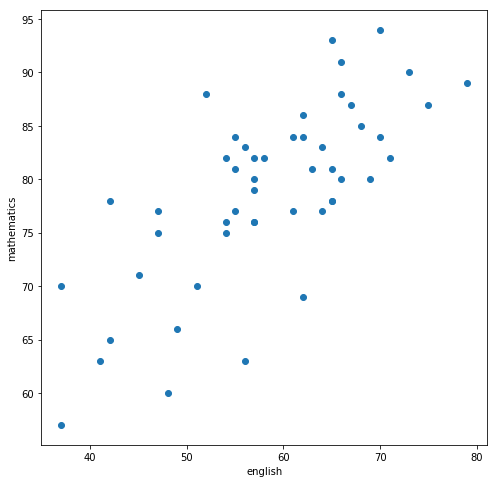

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# 산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

# 2표본 문제에 관한 가설검정

## 대응비교 t검정

In [117]:
training_rel = pd.read_csv('C:/Users/chang/Desktop/data_01.csv', encoding="cp949")
print(training_rel.shape)
training_rel.head()

(20, 4)


,전,후,회사,효과
0,47,49,A,있다
1,50,52,A,있다
2,37,54,B,있다
3,60,48,B,없다
4,39,51,A,있다


In [118]:
training_rel['차이'] = training_rel['후'] - training_rel['전']
training_rel.head()

,전,후,회사,효과,차이
0,47,49,A,있다,2
1,50,52,A,있다,2
2,37,54,B,있다,17
3,60,48,B,없다,-12
4,39,51,A,있다,12


In [114]:
t, p = stats.ttest_1samp(training_rel['차이'], 0)
p

0.06539643502362615

In [73]:
t, p = stats.ttest_rel(training_rel['후'], training_rel['전'])
p

0.06539643502362615

## 독립비교t검정

In [74]:
training_rel = pd.read_csv('C:/Users/chang/Desktop/ch11.csv', encoding="cp949")
print(training_rel.shape)
training_rel.head()

(20, 4)


,전,후,회사,효과
0,47,49,A,있다
1,50,52,A,있다
2,37,54,B,있다
3,60,48,B,없다
4,39,51,A,있다


In [75]:
t, p = scipy.stats.ttest_ind(training_rel['전'], training_rel['후'],
                       equal_var=False)
p

0.08695731107259361

## 카이제곱검정

In [77]:
ad_df = pd.read_csv("C:/Users/chang/Desktop/ch11.csv", encoding="cp949")
n = len(ad_df)
print(n)
ad_df.head()

20


,전,후,회사,효과
0,47,49,A,있다
1,50,52,A,있다
2,37,54,B,있다
3,60,48,B,없다
4,39,51,A,있다


In [79]:
ad_cross = pd.crosstab(ad_df['회사'], ad_df['효과'])
ad_cross

효과,없다,있다
회사,,
A,4,7
B,2,7


In [80]:
ad_cross['있다'] / (ad_cross['있다'] + ad_cross['없다'])

회사
A    0.636364
B    0.777778
dtype: float64

In [81]:
n_not, n_yes = ad_cross.sum()
n_not, n_yes

(6, 14)

In [82]:
n_adA, n_adB = ad_cross.sum(axis=1)
n_adA, n_adB

(11, 9)

In [83]:
ad_ef = pd.DataFrame({'있다': [n_adA * n_yes / n,
                              n_adB * n_yes / n],
                      '없다': [n_adA * n_not / n,
                                   n_adB * n_not / n]},
                      index=['A', 'B'])
ad_ef

,있다,없다
A,7.7,3.3
B,6.3,2.7


In [84]:
y = ((ad_cross - ad_ef) ** 2 / ad_ef).sum().sum()
y

0.4713804713804716

In [85]:
rv = stats.chi2(1)
1 - rv.cdf(y)

0.49235277178773995

In [86]:
chi2, p, dof, ef = stats.chi2_contingency(ad_cross, correction=False)
chi2, p, dof

(0.4713804713804717, 0.49235277178773995, 1)

In [87]:
ef

array([[3.3, 7.7],
       [2.7, 6.3]])

## 단순회귀

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%matplotlib inline

In [125]:
df = pd.read_csv("C:/Users/chang/Desktop/data_03.csv")
n = len(df)
print(n)
df.head()

20


,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk


In [126]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

#### 퀴즈와 잠시간의 상관관계 

In [127]:
np.corrcoef(df["quiz"], df["final_test"])

array([[1.   , 0.822],
       [0.822, 1.   ]])

In [128]:
formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Wed, 26 Aug 2020   Prob (F-statistic):           8.59e-06
Time:                        14:27:42   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

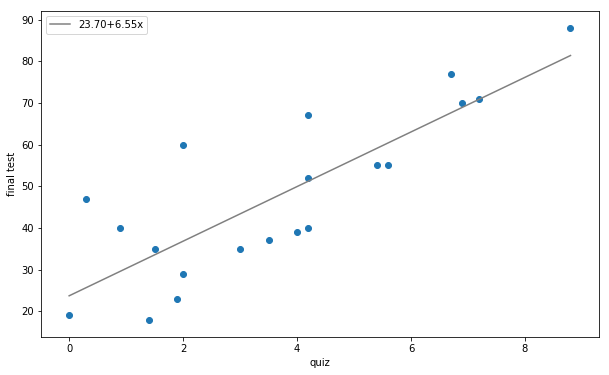

In [129]:
poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('quiz')
ax.set_ylabel('final test')
ax.plot(xs, ys, color='gray', 
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()

plt.show()

## 중회귀모형

In [130]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Wed, 26 Aug 2020   Prob (F-statistic):           6.19e-06
Time:                        14:27:43   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 더미변수

In [131]:
formula = 'final_test ~ quiz + sleep_time + school_method'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Wed, 26 Aug 2020   Prob (F-statistic):           7.47e-05
Time:                        14:27:43   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.3330     12.434      0.107      0.916     -25.169      27.835
school_method[T.bus]     -1.8118      6.324     -0.286      0.778     -15.292      11.668
school_method[T.walk]    -7.6555      6.420     -1.192      0.252     -21.339       6.028
quiz                      6.0029      1.033      5.809      0.000       3.800       8.206
sleep_time                4.5238      1.809      2.501      0.024       0.668       8.380
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.989
Skew:                           0.545   Prob(JB):                        0.610
Kurtosis:                       2.985   Cond. No.                         41.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
y_hat = np.array(result.fittedvalues)
y_hat

array([57.305, 80.292, 23.497, 42.448, 36.61 , 39.304, 24.535, 41.343,
       46.606, 60.021, 44.638, 66.727, 46.812, 81.754, 26.24 , 63.717,
       49.199, 60.317, 20.629, 45.005])

In [133]:
eps_hat = np.array(result.resid)
eps_hat

array([  9.695,  -9.292,  -4.497,  -7.448,  -1.61 ,   0.696,  -1.535,
        -4.343,  -7.606,  -5.021,  -4.638,   3.273, -17.812,   6.246,
        20.76 ,  13.283,   2.801,  -5.317,  -2.629,  14.995])

In [134]:
np.sum(eps_hat ** 2)

1627.2243842937912

### 결정계수 

In [135]:
total_var = np.sum((y - np.mean(y))**2)
exp_var = np.sum((y_hat - np.mean(y))**2)
unexp_var = np.sum(eps_hat ** 2)

In [136]:
total_var, exp_var + unexp_var

(7468.55, 7468.549999999998)

In [137]:
exp_var / total_var

0.782123118370528

In [138]:
np.corrcoef(x, y)[0, 1] ** 2

0.6763457665504998

### 조정결정계수 

In [139]:
1 - (unexp_var / (n - p - 1)) / (total_var / (n - 1))

0.7700188471688909

### F검정 

In [140]:
f = (exp_var / p)  / (unexp_var / (n - p - 1))
f

64.61546551144127

In [141]:
rv = stats.f(p, n-p-1)
1 - rv.cdf(f)

2.289109645170484e-07